In [5]:
cellpose_seg0 = r"output\test\2D_patch_test_0_seg.npy"
cellpose_seg1 = r"output\test\2D_patch_test_1_seg.npy"


In [34]:
import numpy as np
from cellpose import plot, utils, io, models
import matplotlib.pyplot as plt
from skimage.draw import polygon

# Load the segmentation mask
dat_0 = np.load(cellpose_seg0, allow_pickle=True).item()
# Extract the masks and generate outlines
masks_0 = dat_0['masks']
outlines_0 = utils.outlines_list(masks_0) # multiprocessing_threshold=1000



Multiprocessing is disabled for Windows


In [35]:
# Create a blank binary image to fill in the cells
filled_image_0 = np.zeros_like(masks_0, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines_0:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_0.shape)
    filled_image_0[rr, cc] = 255  # Fill with white (255) inside each contour

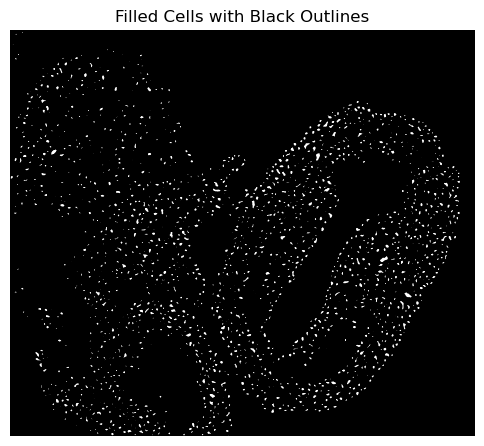

In [36]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image_0, cmap='gray', interpolation='none')
for outline in outlines_0:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth=1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('off')
plt.show()

In [37]:
# Load the segmentation mask
dat_1 = np.load(cellpose_seg1, allow_pickle=True).item()
# Extract the masks and generate outlines
masks_1 = dat_1['masks']
outlines_1 = utils.outlines_list(masks_1) # multiprocessing_threshold=1000

Multiprocessing is disabled for Windows


In [38]:
# Create a blank binary image to fill in the cells
filled_image_1 = np.zeros_like(masks_1, dtype=np.uint8)  # Start with black (0)

# Fill each outline's interior as white
for outline in outlines_1:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_1.shape)
    filled_image_1[rr, cc] = 255  # Fill with white (255) inside each contour

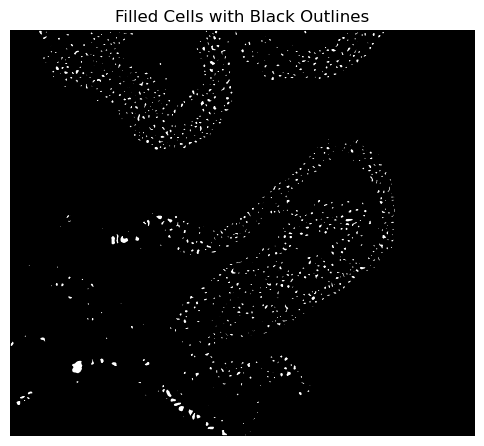

In [39]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(filled_image_1, cmap='gray', interpolation='none')
for outline in outlines_1:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth=1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('off')
plt.show()

In [67]:
# import numpy as np

# # Define adjusted main segment coordinates
# segments = [
#     (0, 1362, 0, 1560),   # Segment 0
#     (1116, 2478, 0, 1560) # Segment 1
# ]

# # Offsets for each segment
# offsets = [
#     (0, 0),               # No offset for Segment 0
#     (1116, 0)             # Offset for Segment 1 (row offset, column offset)
# ]

# # New outline list
# new_outlines = []

# # Map outlines_1 (Segment 0)
# for outline in outlines_0:
#     outline = np.array(outline)  # Ensure outline is a NumPy array
#     adjusted_outline = outline + offsets[0]  # Apply offset (no change for Segment 0)
#     new_outlines.append(adjusted_outline.tolist())

# # Map outlines_2 (Segment 1)
# for outline in outlines_1:
#     outline = np.array(outline)  # Ensure outline is a NumPy array
#     adjusted_outline = outline + offsets[1]  # Apply Segment 1 offset
#     new_outlines.append(adjusted_outline.tolist())

# print(f"Generated {len(new_outlines)} adjusted outlines.")


Generated 1087 adjusted outlines.


In [62]:
import numpy as np

# Define adjusted main segment coordinates
segments = [
    (0, 1362, 0, 1560),   # Segment 0
    (1116, 2478, 0, 1560) # Segment 1
]

# Offsets for each segment
offsets = [
    [0, 0],               # No offset for Segment 0
    [1116, 0]             # Offset for Segment 1 (row offset, column offset)
]

# Combine outlines with their corresponding offsets
outlines_list = [outlines_0, outlines_1]  # List of outlines for segments
new_outlines = []

# Adjust outlines based on offsets
for outlines, offset in zip(outlines_list, offsets):
    for outline in outlines:
        outline = np.array(outline, dtype=np.int32)  # Ensure outline is a NumPy array
        adjusted_outline = outline + np.array(offset)  # Apply offset
        new_outlines.append(adjusted_outline.tolist())  # Convert back to list for storage

print(f"Generated {len(new_outlines)} adjusted outlines.")


Generated 3122 adjusted outlines.


In [63]:
outlines_1

[array([[ 93,   0],
        [ 93,   1],
        [ 94,   2],
        [ 95,   3],
        [ 95,   4],
        [ 95,   5],
        [ 95,   6],
        [ 95,   7],
        [ 96,   8],
        [ 96,   9],
        [ 97,  10],
        [ 98,  11],
        [ 98,  12],
        [ 99,  13],
        [100,  14],
        [101,  15],
        [102,  16],
        [103,  16],
        [104,  17],
        [105,  17],
        [106,  17],
        [107,  17],
        [108,  16],
        [109,  16],
        [109,  15],
        [110,  14],
        [110,  13],
        [110,  12],
        [109,  11],
        [109,  10],
        [108,   9],
        [108,   8],
        [108,   7],
        [108,   6],
        [108,   5],
        [108,   4],
        [108,   3],
        [108,   2],
        [109,   1],
        [109,   0],
        [108,   0],
        [107,   0],
        [106,   0],
        [105,   0],
        [104,   0],
        [103,   0],
        [102,   0],
        [101,   0],
        [100,   0],
        [ 99,   0],


In [64]:
adjusted_outline

array([[1980, 1356],
       [1979, 1357],
       [1978, 1358],
       [1977, 1359],
       [1977, 1360],
       [1976, 1361],
       [1977, 1361],
       [1978, 1361],
       [1979, 1361],
       [1980, 1361],
       [1981, 1361],
       [1982, 1361],
       [1983, 1361],
       [1984, 1361],
       [1985, 1361],
       [1986, 1361],
       [1986, 1360],
       [1985, 1359],
       [1984, 1358],
       [1983, 1357],
       [1982, 1356],
       [1981, 1356]])

In [65]:
# Define the shape of the new mask
mask_shape = (2478, 1560)

# Create a zero-filled mask
filled_image_new = np.zeros(mask_shape, dtype=np.uint8) 


# Fill each outline's interior as white
for outline in new_outlines:
    # Ensure the outline coordinates are in integer format
    outline = np.array(outline, dtype=np.int32)
    
    # Get the rows and columns for the interior of each polygon
    rr, cc = polygon(outline[:, 1], outline[:, 0], filled_image_1.shape)
    filled_image_new[rr, cc] = 255  # Fill with white (255) inside each contour

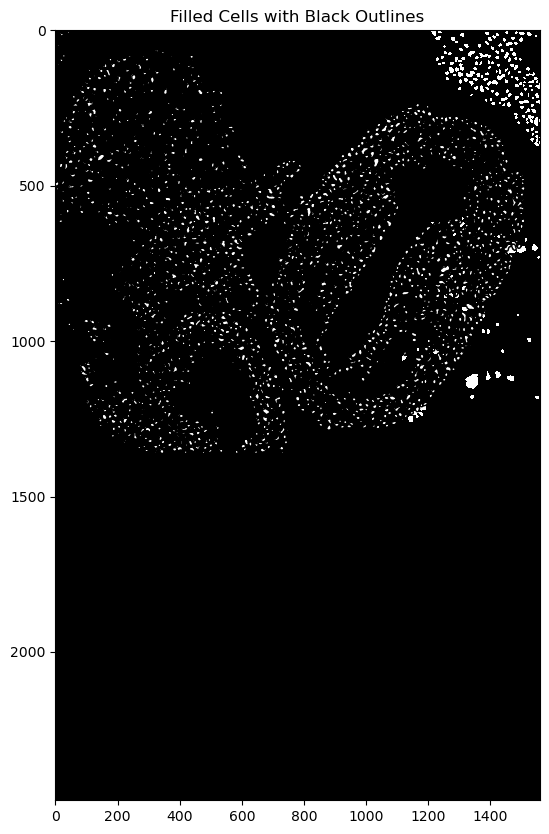

In [66]:
# Plot the filled binary image with black outlines
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(filled_image_new, cmap='gray', interpolation='none')
for outline in outlines_0:
    plt.plot(outline[:, 0], outline[:, 1], color='black', linewidth=1)  # Add black outlines on top

ax.set_title("Filled Cells with Black Outlines")
ax.axis('on')
plt.show()